<a href="https://colab.research.google.com/github/IrynaBarnych/AI_EX/blob/main/exam/%D0%95%D0%BA%D0%B7%D0%B0%D0%BC%D0%B5%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основні умови

Студент обирає **одне завдання** на вибір, або узгоджує власний проект з викладачем. Студент повен показати розуміння роботи з даними та побудови моделі.

Студент самостійно пише увесь код до початку екзамену. Під час екзамену кожен студент презентує свою роботу викладачу та відповідає на основні питання, що стосуються проекту, також можуть бути додаткові питання на кристалики\більші бали.

Робота повинна бути оформлена як готовий код, який на прохання викладача можна буде запустити або внести певні зміни. На вибір студента можна використовувати Colab чи Kaggle

# Завдання 1

Дані про ... Опис даних:
* *case_id:* Ідентифікатор порядкового номеру досліду
* *Vpr:* Швидкість притиру, мм/сек
* *Vjpr:* Напруга живлення притиру, В:
* *Vngw:* Частота обертання шліфувального круга, об/хв
* *Vdan:* Перетворювач частоти ДАНФОСС VLT MICRO DRIVE FC51, Гц
* *Mater:* Матеріал притиру
* *Depertm:* Присутній на дослідженнях (представник кафедри)
* *Days:* Дні експерименту (1-5)
* *Ppr:* Потужність притиру, кВт
* *Ef:* Ефективність (%)
* *W:* Витрати енергії, kWh
* *T:* Температура, °C
* *Sh:* Вимірювання шуму, дБ
* *Model:* Модель станка
* *Angle:* Кут нахилу або нахил шліфувального станка

## Умова

**Тип задачі**

Модель повинна спрогнозувати вплив швидкості притиру на інші показники. Вам потрібно розв'язати цю задачу як задачу класифікації(спрогнозувати діапазон Напруга живлення притиру, В) та задачу регресії(спрогнозувати саму кількість даних Напруга живлення притиру, В), у випадку задачі регресії вам потрібно згенерувати нову цільову ознаку Vjpr_new на основі Vjpr, як середнє значення діапазону.

При тренуванні моделей у вас може бути лише одина ознака Vjpr чи Vjpr_new

**Провести попередній аналіз даних**
* ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків
* перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити
* перевірити дані на наявність викидів, при необхідності створити **нові дані** без викидів
* вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
  1. чи видно викиди
  2. скільки є піків
  3. чи зміщенна гістограма вліво\вправо
* вивести ящики з вусами для числових ознак, дати опис ящикам:
  1. в якому діапазоні зосереджено 25%\50%\75%\100% даних
  2. чи є викиди
  3. чи зміщені ящики вліво\вправо
* вивести гістограми з кількостями для категоріальних ознак
* вивести групові ящики з вусами для числової та категоріальної ознаки, вказати від якої категоріальної ознаки залежить числова ознака і як саме
* вивести точкові діаграми для числових ознак, вказати для яких числових ознак є залежність

**Побудова моделі для задач класифікації та регресії**
* при необхідності згенерувати нові ознаки
* самостійно обрати модель для тренування або обрати за допомогою `optuna`
* розділити **дані без викидів** на тренувальні та тестові, можливо валідаційні якщо потрібно
* вибрати метрики для оцінки якості моделі, вибір пояснити
* побудувати препроцесор
* натренувати модель
* вивести метрики для тестових даних, дати оцінку якості моделі
* зберегти натреновану модель

**Додатково**
* порівняти результат моделі на неочищених від викидів даних
* застосувати підбір гіперпараметрів

In [ ]:
import pandas as pd
# Зчитування файлу Excel
df = pd.read_excel("/content/дані.xlsx")
# Виведення перших декількох рядків для перевірки
df.head()

,case_id,Vpr,Vjpr,Vngw,Vdan,Mater,Depertm,Days,Ppr,Ef,W,T,Sh,Mode,Angle
0,1.0,0.10,0-0.2,680.0,15.0,мінералокераміка,лаборант,перший,0.0015,83.0,0.03,25.0,65.0,XYZ-500,7.0
1,2.0,0.40,0-0.2,975.0,23.0,мінералокераміка,аспірант,другий,0.0096,22.0,0.05,30.0,70.0,ABG-2000,8.0
2,3.0,0.05,0-0.2,570.0,37.0,металокераміка,професор,третій,0.0228,57.0,0.07,28.0,68.0,CNC-8000,6.0
3,4.0,0.60,0-0.2,1980.0,47.0,мінералокераміка,аспірант,четвертий,0.1782,95.0,0.04,32.0,72.0,EFG-450,9.0
4,5.0,0.15,0-0.2,2400.0,52.0,металокераміка,професор,п'ятий,0.0624,41.0,0.06,27.0,67.0,JKL-1200,10.0


ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків

In [ ]:
df.head()

,case_id,Vpr,Vjpr,Vngw,Vdan,Mater,Depertm,Days,Ppr,Ef,W,T,Sh,Mode,Angle
0,1.0,0.10,0-0.2,680.0,15.0,мінералокераміка,лаборант,перший,0.0015,83.0,0.03,25.0,65.0,XYZ-500,7.0
1,2.0,0.40,0-0.2,975.0,23.0,мінералокераміка,аспірант,другий,0.0096,22.0,0.05,30.0,70.0,ABG-2000,8.0
2,3.0,0.05,0-0.2,570.0,37.0,металокераміка,професор,третій,0.0228,57.0,0.07,28.0,68.0,CNC-8000,6.0
3,4.0,0.60,0-0.2,1980.0,47.0,мінералокераміка,аспірант,четвертий,0.1782,95.0,0.04,32.0,72.0,EFG-450,9.0
4,5.0,0.15,0-0.2,2400.0,52.0,металокераміка,професор,п'ятий,0.0624,41.0,0.06,27.0,67.0,JKL-1200,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case_id  49 non-null     float64
 1   Vpr      49 non-null     float64
 2   Vjpr     49 non-null     object 
 3   Vngw     46 non-null     float64
 4   Vdan     50 non-null     float64
 5   Mater    47 non-null     object 
 6   Depertm  48 non-null     object 
 7   Days     48 non-null     object 
 8   Ppr      48 non-null     float64
 9   Ef       49 non-null     float64
 10  W        47 non-null     float64
 11  T        49 non-null     float64
 12  Sh       47 non-null     float64
 13  Mode     48 non-null     object 
 14  Angle    48 non-null     float64
dtypes: float64(10), object(5)
memory usage: 8.6+ KB


перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити

In [ ]:
df=df.dropna()

In [ ]:
df= df.drop(columns=['Mater'])

In [ ]:
df= df.drop(columns=['Depertm'])

In [ ]:
df= df.drop(columns=['Mode'])

In [ ]:
df= df.drop(columns=['Days'])

In [ ]:
df= df.drop(columns=['case_id'])

In [ ]:
df.head()

,Vpr,Vjpr,Vngw,Vdan,Ppr,Ef,W,T,Sh,Angle
0,0.10,0-0.2,680.0,15.0,0.0015,83.0,0.03,25.0,65.0,7.0
1,0.40,0-0.2,975.0,23.0,0.0096,22.0,0.05,30.0,70.0,8.0
2,0.05,0-0.2,570.0,37.0,0.0228,57.0,0.07,28.0,68.0,6.0
3,0.60,0-0.2,1980.0,47.0,0.1782,95.0,0.04,32.0,72.0,9.0
4,0.15,0-0.2,2400.0,52.0,0.0624,41.0,0.06,27.0,67.0,10.0


перевірити дані на наявність викидів, при необхідності створити нові дані без викидів

In [ ]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [ ]:
df1 = df.copy()

for column_name in df1.columns:
  if df1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  df1 = remove_outliers(df1, column_name)

df1.shape

(37, 10)

In [ ]:
# Функція для заміни діапазонів на середні значення
def replace_range_with_average(value):
    if isinstance(value, str) and '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    else:
        return value

df['Vjpr'] = df['Vjpr'].apply(replace_range_with_average)

# Створення нової цільової ознаки Vjpr_new
df['Vjpr_new'] = df['Vjpr']

# Перевірка даних на наявність викидів та їх видалення, якщо необхідно
def remove_outliers(df, column_name):
    column = df[column_name]
    q1 = column.quantile(q=0.25)
    q3 = column.quantile(q=0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mask = (column >= lower) & (column <= upper)
    return df[mask]

df1 = df.copy()
for column_name in df1.columns:
    if df1.dtypes[column_name] in ("object", "datetime64[ns]"):
        continue
    df1 = remove_outliers(df1, column_name)

df1.shape

(37, 11)

вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
- чи видно викиди
- скільки є піків
- чи зміщенна гістограма вліво\вправо

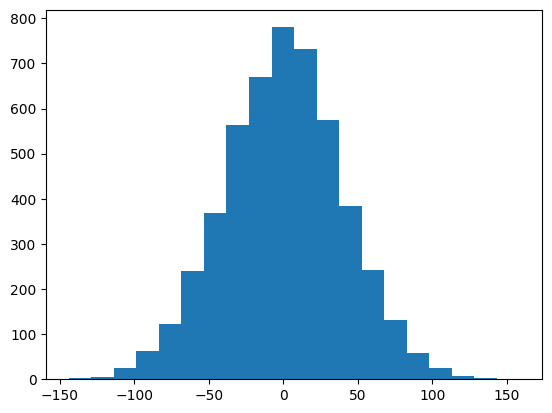

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

norm_data = np.random.normal(loc=0,      # середнє арифметичне
                             scale=40,   # стандартне відхилення
                             size=(5000,))

plt.hist(norm_data, bins=20)
plt.show()

Викиди: Викидів немає, всі значення концентровані навколо центрального значення.

Кількість піків: Один пік, що вказує на нормальний розподіл.

Зміщення: Гістограма симетрична, не зміщена ні вліво, ні вправо.

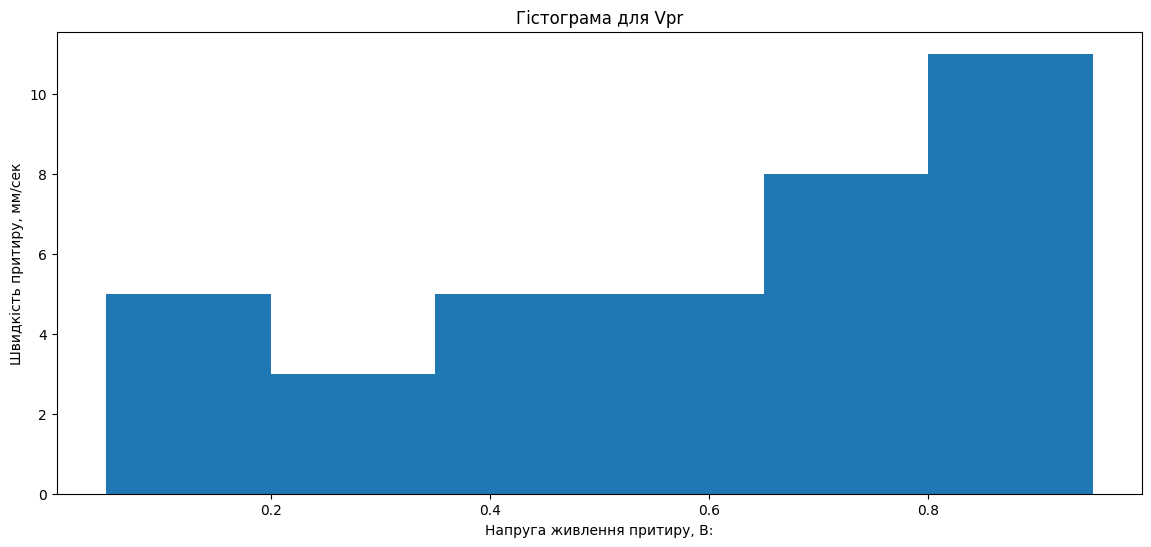

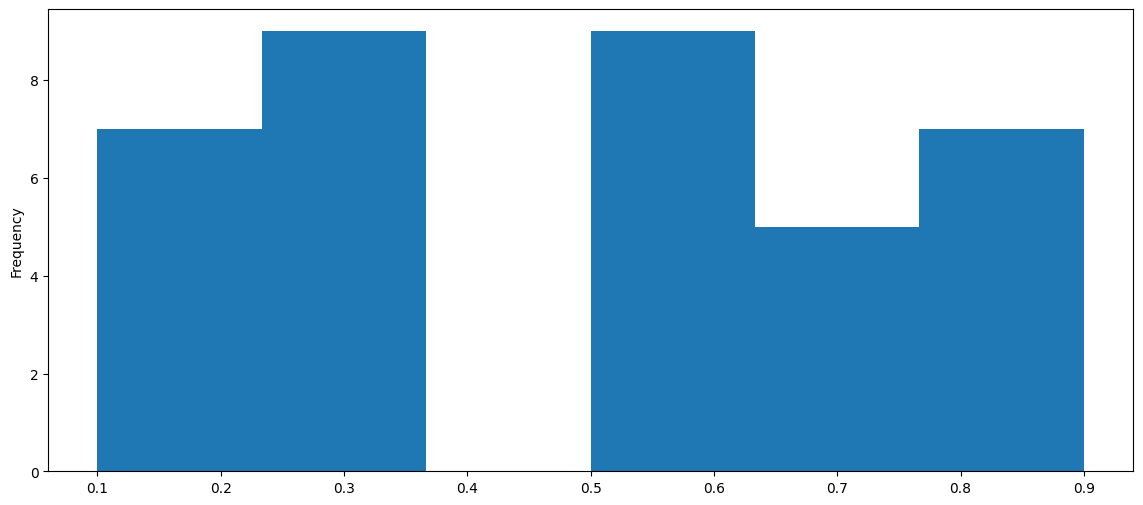

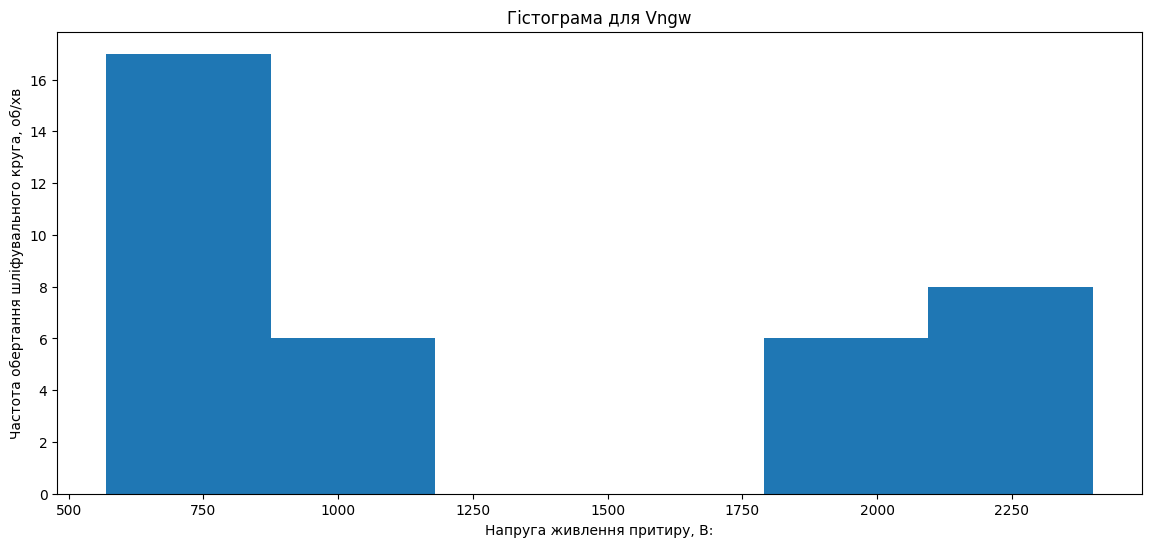

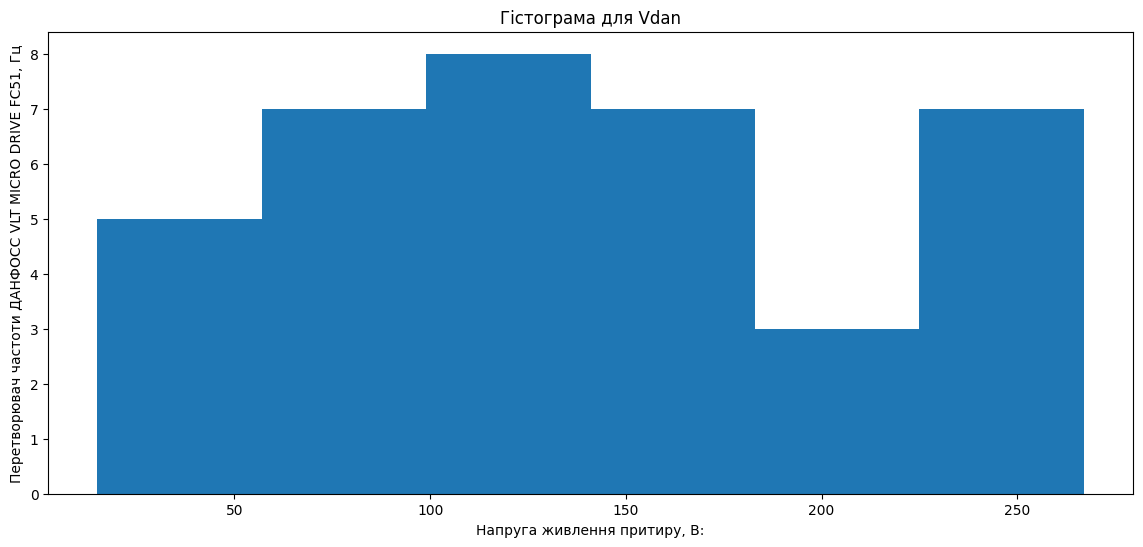

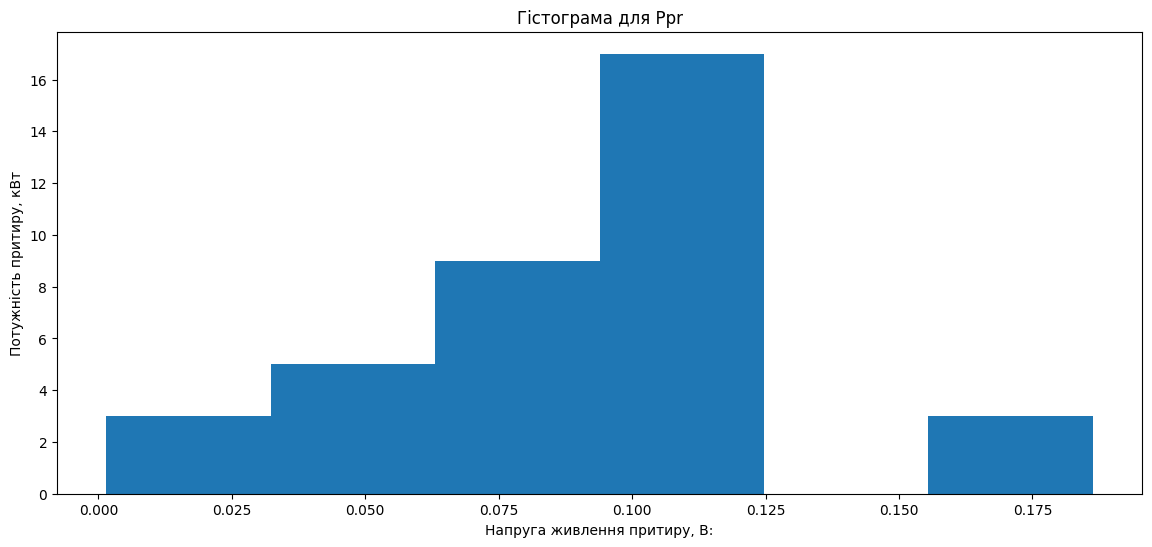

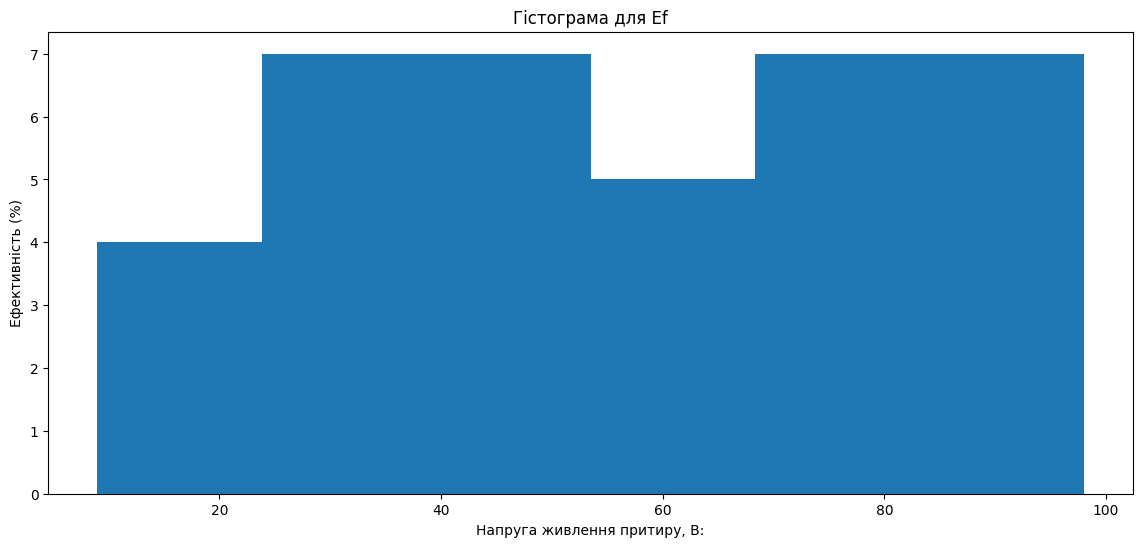

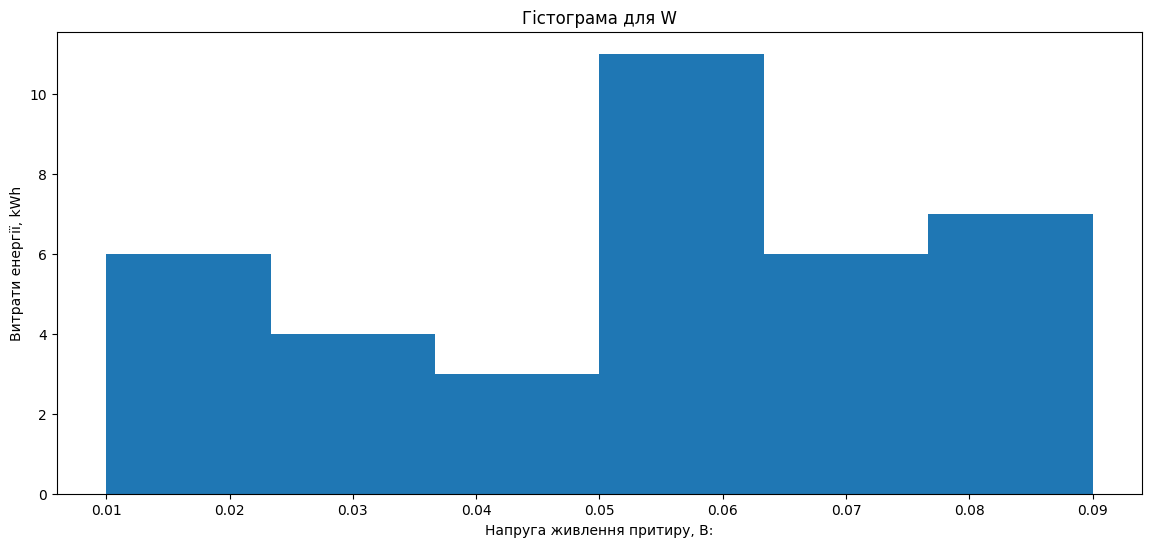

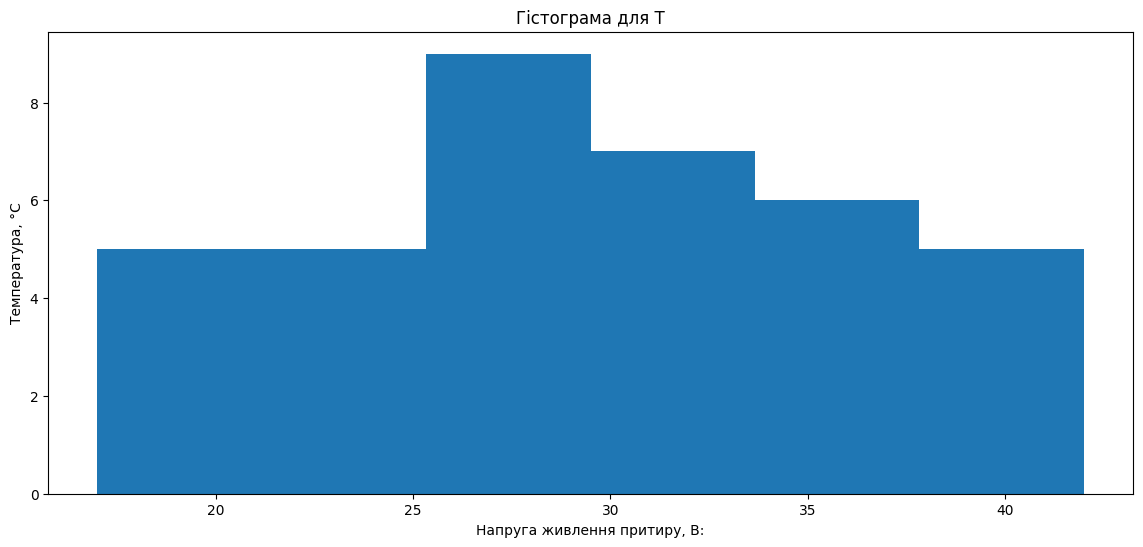

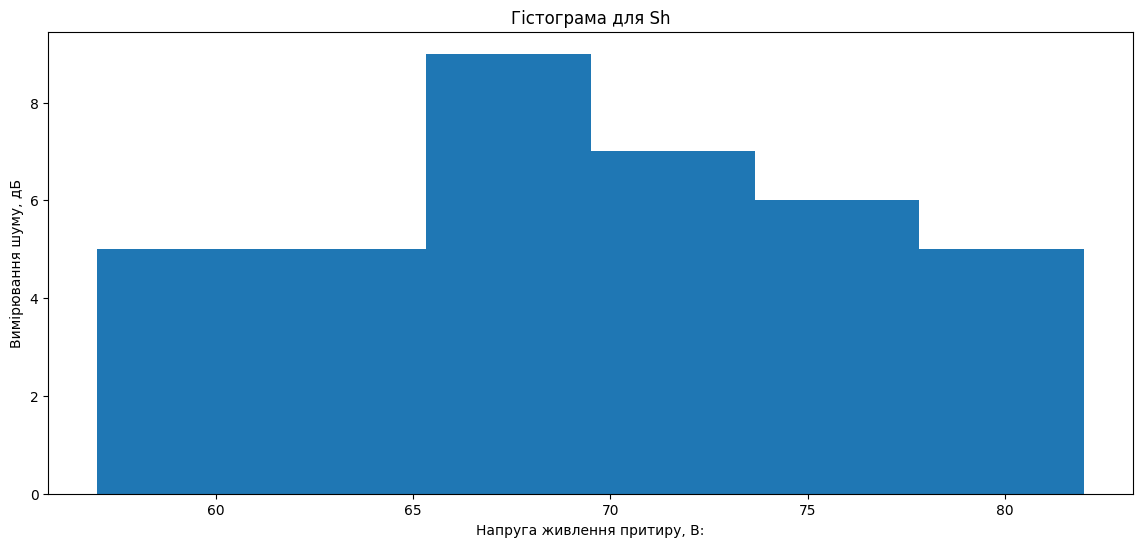

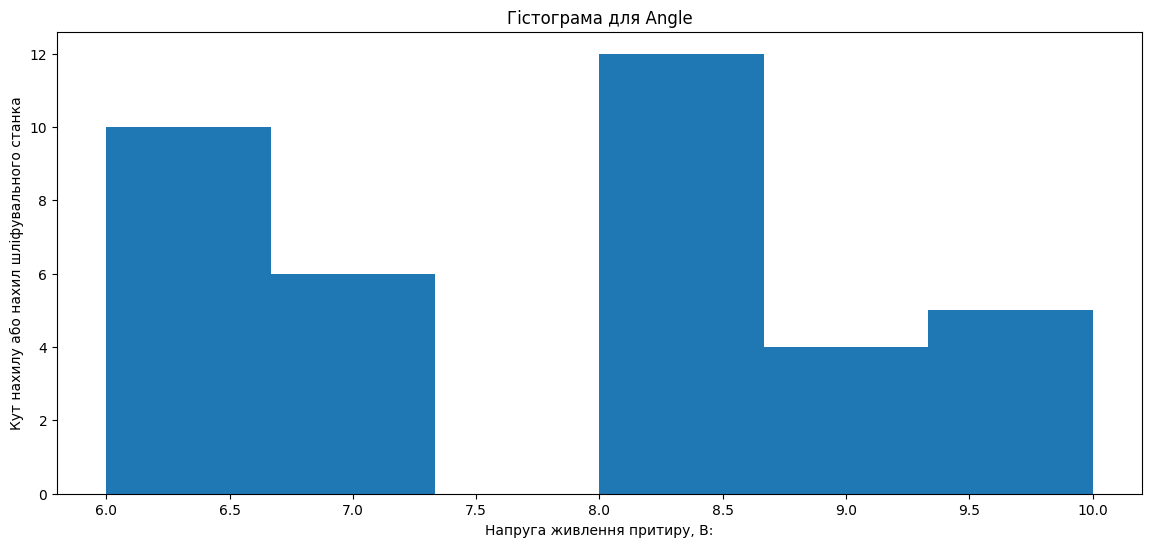

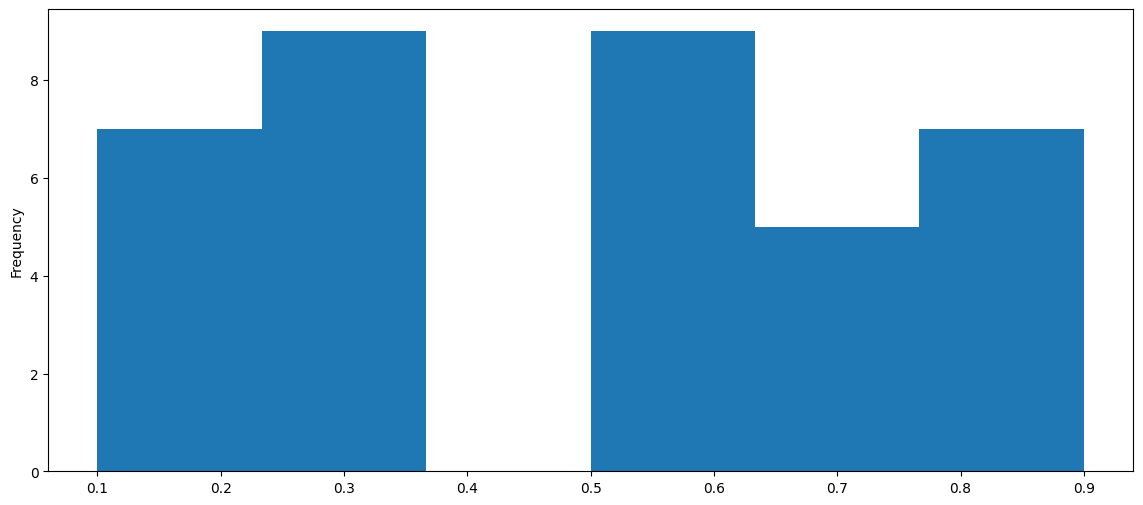

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Описи гістограм
hist_descriptions = {
    'Vpr': {'title': 'Гістограма для Vpr', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Швидкість притиру, мм/сек'},
    'Vngw': {'title': 'Гістограма для Vngw', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Частота обертання шліфувального круга, об/хв'},
    'Vdan': {'title': 'Гістограма для Vdan', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Перетворювач частоти ДАНФОСС VLT MICRO DRIVE FC51, Гц'},
    'Ppr': {'title': 'Гістограма для Ppr', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Потужність притиру, кВт'},
    'Ef': {'title': 'Гістограма для Ef', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Ефективність (%)'},
    'W': {'title': 'Гістограма для W', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Витрати енергії, kWh'},
    'T': {'title': 'Гістограма для T', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Температура, °C'},
    'Sh': {'title': 'Гістограма для Sh', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Вимірювання шуму, дБ'},
    'Angle': {'title': 'Гістограма для Angle', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Кут нахилу або нахил шліфувального станка'}
}

num_cols = int(np.sqrt(df.shape[0]))

for column_name in df.columns:
    if df.dtypes[column_name] != "object":
        ax = df[column_name].plot(kind='hist', bins=num_cols, figsize=(14, 6))


        if column_name in hist_descriptions:
            ax.set_title(hist_descriptions[column_name]['title'])
            ax.set_xlabel(hist_descriptions[column_name]['xlabel'])
            ax.set_ylabel(hist_descriptions[column_name]['ylabel'])

        plt.show()


Гістограма для Vpr
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним провалом всередині.
Зміщення: Гістограма зміщена вправо.

Гістограма для Vngw
Викиди: Викидів немає, розподіл рівномірний.
Кількість піків: два піки, що вказують на розподіл.
Зміщення: Гістограма не зміщена, але має два виражені піки.

Гістограма для Vdan
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним провалом вправо.
Зміщення: Гістограма зміщена вліво.

Гістограма для Ppr
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним провалом вправо.
Зміщення: Гістограма зміщена вліво.

Гістограма для Ef
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним провалом всередині та на початку.
Зміщення: Гістограма зміщена вліво.

Гістограма для W
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним провалом всередині та підйомом посередині.
Зміщення: Гістограма зміщена вправо.

Гістограма для T
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним підйомом посередині.
Зміщення: Гістограма зміщена вправо.

Гістограма для Sh
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним підйомом посередині.
Зміщення: Гістограма зміщена вправо.

Гістограма для Angle
Викиди: Викидів немає, але дані розподілені нерівномірно.
Кількість піків: Один пік з помітним провалом всередині та підйомом посередині.
Зміщення: Гістограма зміщена вправо.

вивести ящики з вусами для числових ознак, дати опис ящикам:
в якому діапазоні зосереджено 25%\50%\75%\100% даних
чи є викиди
чи зміщені ящики вліво\вправо

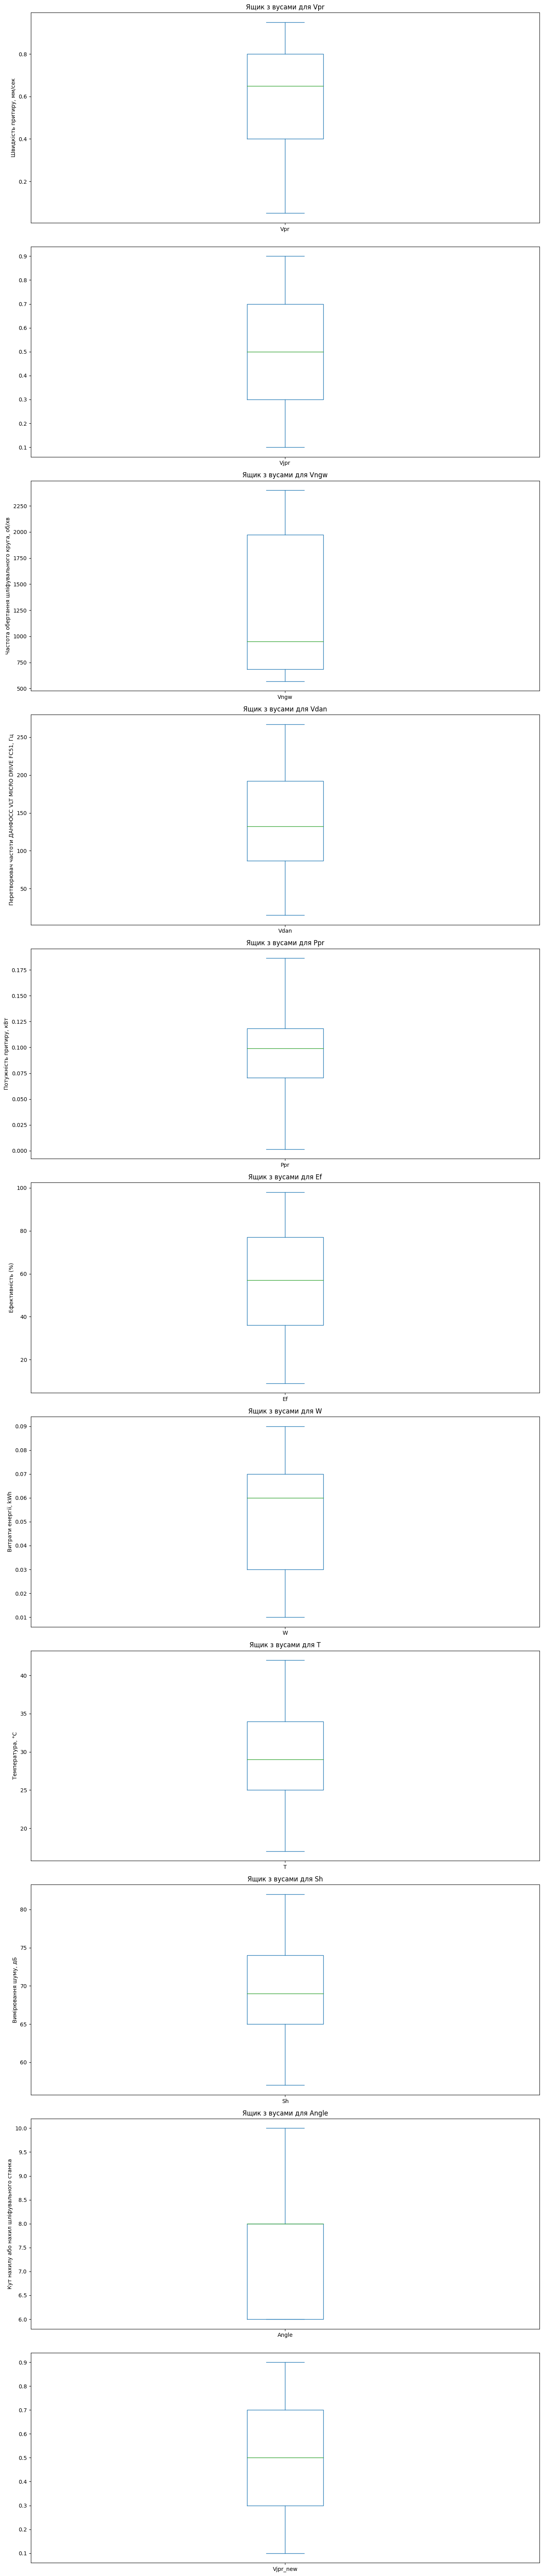

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Описи ящиків з вусами
boxplot_descriptions = {
    'Vpr': {'title': 'Ящик з вусами для Vpr', 'ylabel': 'Швидкість притиру, мм/сек'},
    'Vngw': {'title': 'Ящик з вусами для Vngw', 'ylabel': 'Частота обертання шліфувального круга, об/хв'},
    'Vdan': {'title': 'Ящик з вусами для Vdan', 'ylabel': 'Перетворювач частоти ДАНФОСС VLT MICRO DRIVE FC51, Гц'},
    'Ppr': {'title': 'Ящик з вусами для Ppr', 'ylabel': 'Потужність притиру, кВт'},
    'Ef': {'title': 'Ящик з вусами для Ef', 'ylabel': 'Ефективність (%)'},
    'W': {'title': 'Ящик з вусами для W', 'ylabel': 'Витрати енергії, kWh'},
    'T': {'title': 'Ящик з вусами для T', 'ylabel': 'Температура, °C'},
    'Sh': {'title': 'Ящик з вусами для Sh', 'ylabel': 'Вимірювання шуму, дБ'},
    'Angle': {'title': 'Ящик з вусами для Angle', 'ylabel': 'Кут нахилу або нахил шліфувального станка'}
}

# Створення фігури та осі
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(14, 6*len(df.columns)))

# Відображення ящиків з вусами
for i, column_name in enumerate(df.columns):
    if df.dtypes[column_name] != "object":
        ax = axs[i]
        df[column_name].plot(kind='box', ax=ax)

        # Перевірка наявності ключа у словнику перед використанням
        if column_name in boxplot_descriptions:
            # Додавання описів, якщо ключ існує
            ax.set_title(boxplot_descriptions[column_name]['title'])
            ax.set_ylabel(boxplot_descriptions[column_name]['ylabel'])

plt.tight_layout()
plt.show()


Vpr
На основі цих даних можна зробити висновок, що розподіл числових даних схильний вправо, з даними, які зосереджені ближче до верхнього квартилю та верхньої межі. Викидів не спостерігається, і розподіл можна вважати стабільним.

Vngw
На основі цих даних можна зробити висновок, що розподіл числових даних схильний вліво, з даними, які зосереджені ближче до нижнього квартилю та нижньої межі. Викидів не спостерігається, і розподіл можна вважати стабільним.

Vdan
На основі цих даних можна зробити висновок, що розподіл числових даних схильний ближче посередині зі зміщенням вліво, з даними, які зосереджені ближче посередині. Викидів не спостерігається, і розподіл можна вважати стабільним.

Ppr
На основі цих даних можна зробити висновок, що розподіл числових даних схильний ближче посередині зі зміщенням вправо, з даними, які зосереджені ближче посередині. Викидів не спостерігається, і розподіл можна вважати стабільним.

Ef
На основі цих даних можна зробити висновок, що розподіл числових даних схильний ближче посередині, з даними, які зосереджені ближче посередині. Викидів не спостерігається, і розподіл можна вважати стабільним

W
На основі цих даних можна зробити висновок, що розподіл числових даних схильний вправо, з даними, які зосереджені ближче до верхнього квартилю та верхньої межі. Викидів не спостерігається, і розподіл можна вважати стабільним.

T
На основі цих даних можна зробити висновок, що розподіл числових даних схильний вліво, з даними, які зосереджені ближче до нижнього квартилю та нижньої межі. Викидів не спостерігається, і розподіл можна вважати стабільним.

Sh
На основі цих даних можна зробити висновок, що розподіл числових даних схильний вліво, з даними, які зосереджені ближче до нижнього квартилю та нижньої межі. Викидів не спостерігається, і розподіл можна вважати стабільним.

Angle
   - 25% даних розташовано від нижньої межі (6) до першого квартилю (6) (25% даних).
   - 50% даних розташовано від нижньої межі (6) до медіани (8) (50% даних).
   - 75% даних розташовано від нижньої межі (6) до верхнього квартилю (8) (75% даних).
   - 100% даних охоплюють весь діапазон від 6 до верхньої межі (10).

2. Викиди:
   - Даних поза верхньою межею (10) немає, тому викидів не спостерігається.

3. Зміщеність ящика:
   - Оскільки медіана (8) співпадає з верхнім квартилем (8), розподіл даних можна вважати збалансованим без зміщення вліво або вправо.

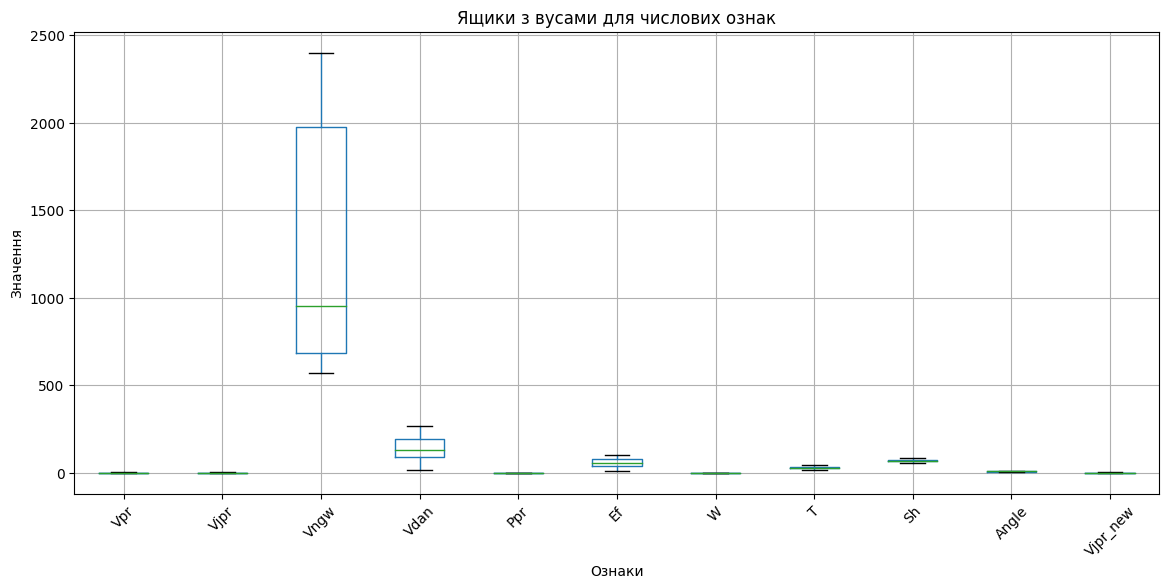

In [ ]:
# Відображення ящиків з вусами для всіх числових ознак
plt.figure(figsize=(14, 6))
df.boxplot(rot=45)
plt.title('Ящики з вусами для числових ознак')
plt.ylabel('Значення')
plt.xlabel('Ознаки')
plt.show()



З графіка видно, що змінна Vngw має найбільшу варіативність серед усіх інших ознак, із значеннями від приблизно 700 до 2300. Змінні Vdan та Ef також показують трохи більшу варіативність у порівнянні із іншими ознаками, але в меншій мірі. Інші змінні мають дуже малі значення і видовжені "вуса" що свідчить про те, що вони мають меншу варіативність та менше значення в порівнянні з Vingw.

Відображення гістограми для категоріальних ознак

In [ ]:
corr = df.corr(method='pearson')

corr


,Vpr,Vjpr,Vngw,Vdan,Ppr,Ef,W,T,Sh,Angle,Vjpr_new
Vpr,1.000000,0.516612,0.086227,0.542416,0.216834,0.155235,0.043258,0.271553,0.271553,-0.094399,0.516612
Vjpr,0.516612,1.000000,0.024292,0.977276,0.173459,-0.129592,-0.082998,0.122691,0.122691,-0.225571,1.000000
Vngw,0.086227,0.024292,1.000000,-0.009818,0.267154,-0.178879,-0.026177,0.155226,0.155226,-0.023358,0.024292
Vdan,0.542416,0.977276,-0.009818,1.000000,0.244794,-0.129051,-0.080891,0.127633,0.127633,-0.130767,0.977276
Ppr,0.216834,0.173459,0.267154,0.244794,1.000000,-0.028561,-0.101307,0.055976,0.055976,0.205194,0.173459
Ef,0.155235,-0.129592,-0.178879,-0.129051,-0.028561,1.000000,0.030987,-0.140053,-0.140053,0.245954,-0.129592
W,0.043258,-0.082998,-0.026177,-0.080891,-0.101307,0.030987,1.000000,0.185818,0.185818,-0.109502,-0.082998
T,0.271553,0.122691,0.155226,0.127633,0.055976,-0.140053,0.185818,1.000000,1.000000,-0.146079,0.122691
Sh,0.271553,0.122691,0.155226,0.127633,0.055976,-0.140053,0.185818,1.000000,1.000000,-0.146079,0.122691
Angle,-0.094399,-0.225571,-0.023358,-0.130767,0.205194,0.245954,-0.109502,-0.146079,-0.146079,1.000000,-0.225571


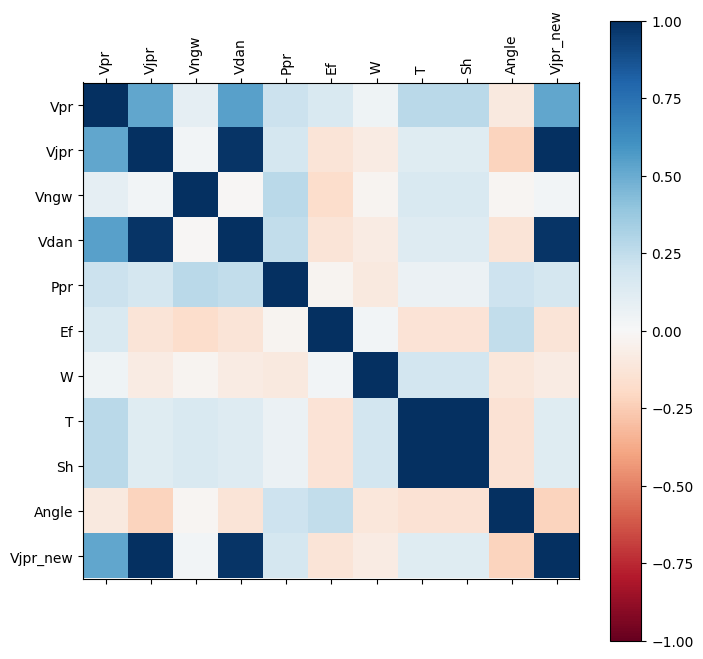

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

# підписи для рядків та стовпчиків матриці
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

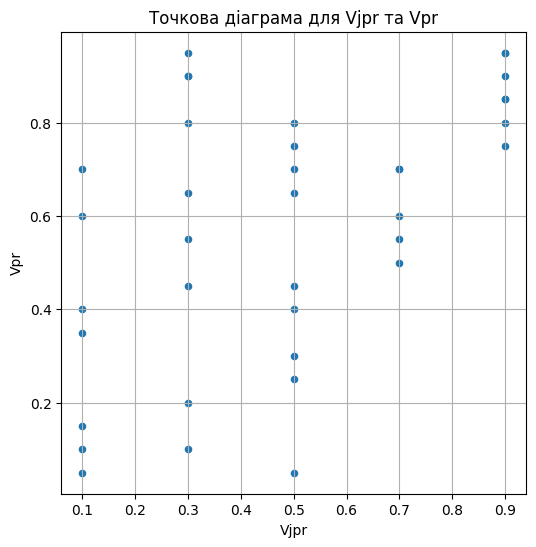

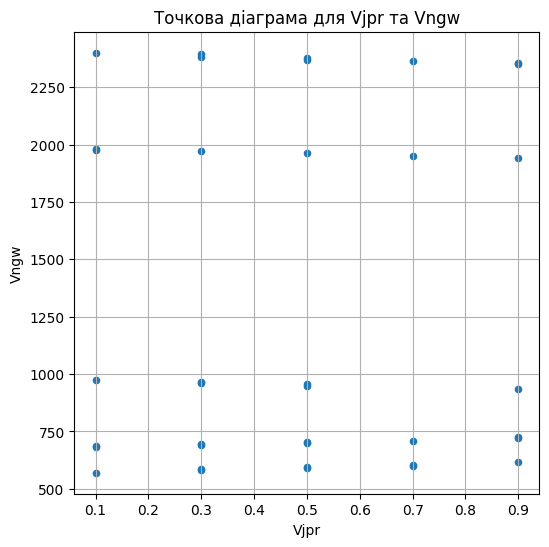

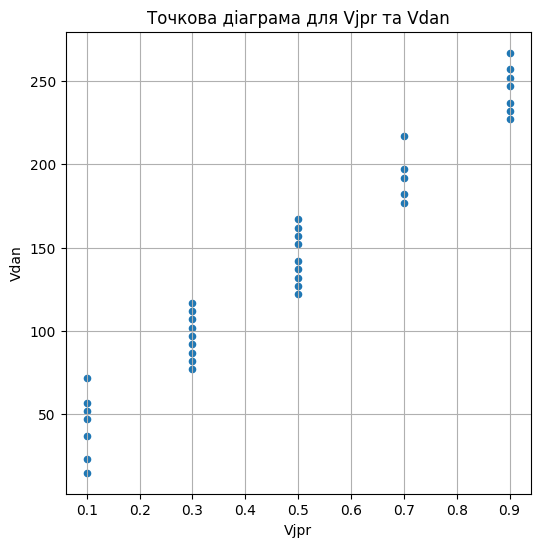

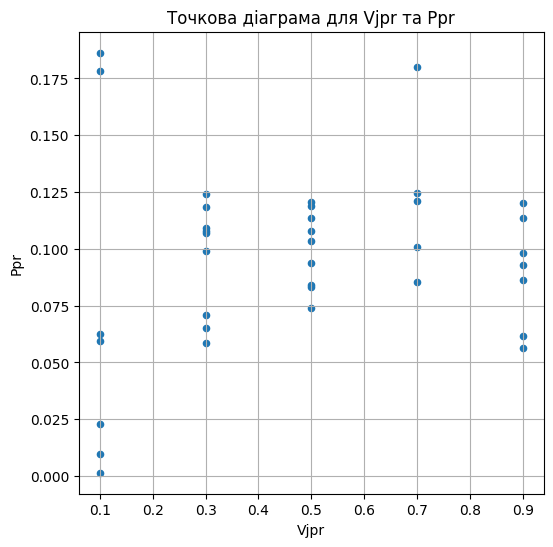

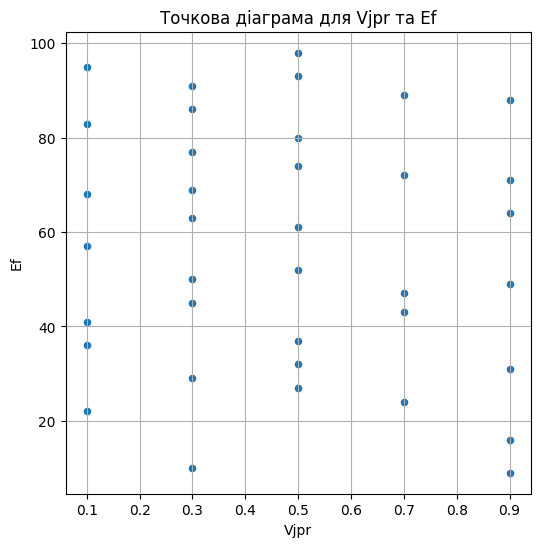

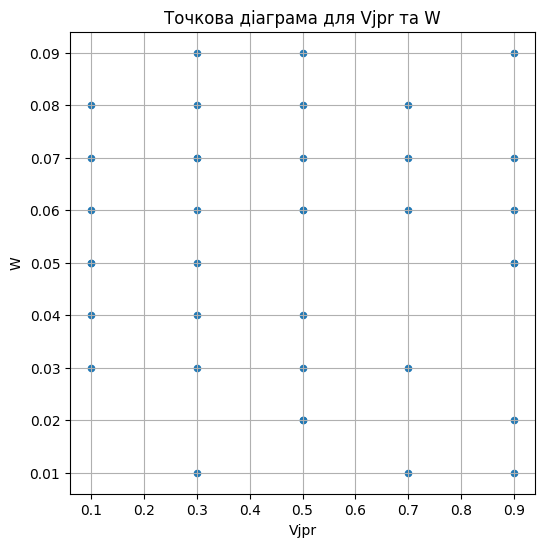

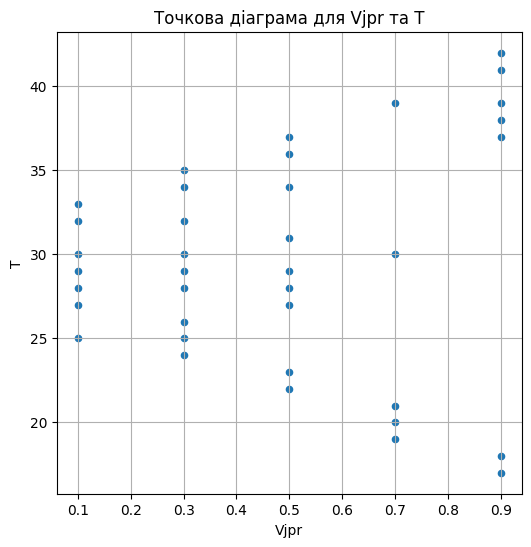

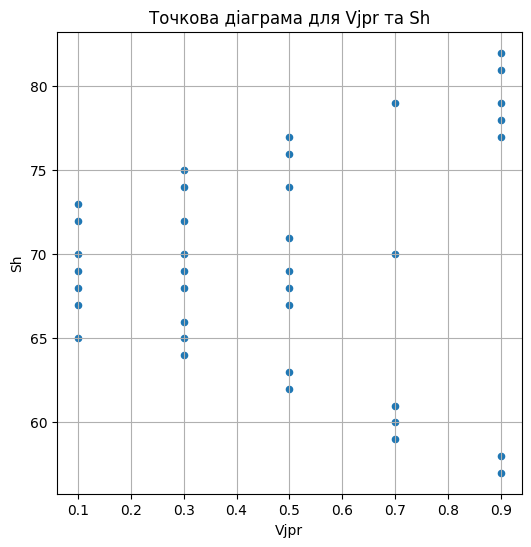

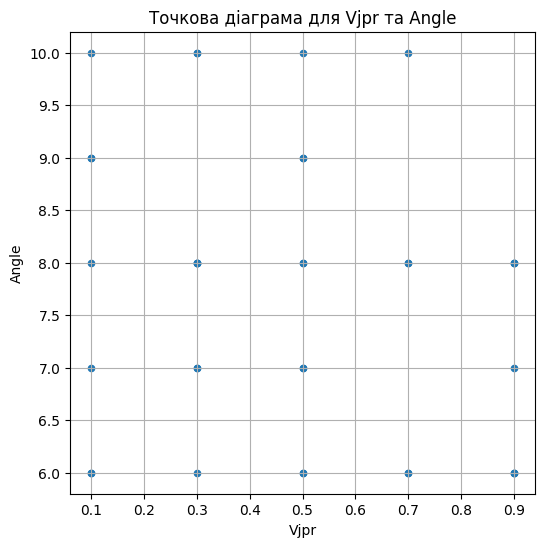

In [ ]:
numerical_features = ['Vpr', 'Vngw', 'Vdan', 'Ppr', 'Ef', 'W', 'T', 'Sh', 'Angle']

# Створення точкових діаграм для кожної числової ознаки по відношенню до Vjpr
for feature in numerical_features:
    df.plot(kind='scatter', x='Vjpr', y=feature, figsize=(6,6), title=f'Tочкова діаграма для Vjpr та {feature}')
    plt.xlabel('Vjpr')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import lightgbm as lgb

!pip install -q optuna
import optuna


In [ ]:
df = pd.read_excel("/content/дані.xlsx")
# Виведення перших декількох рядків для перевірки
df.head()

,case_id,Vpr,Vjpr,Vngw,Vdan,Mater,Depertm,Days,Ppr,Ef,W,T,Sh,Mode,Angle
0,1.0,0.10,0-0.2,680.0,15.0,мінералокераміка,лаборант,перший,0.0015,83.0,0.03,25.0,65.0,XYZ-500,7.0
1,2.0,0.40,0-0.2,975.0,23.0,мінералокераміка,аспірант,другий,0.0096,22.0,0.05,30.0,70.0,ABG-2000,8.0
2,3.0,0.05,0-0.2,570.0,37.0,металокераміка,професор,третій,0.0228,57.0,0.07,28.0,68.0,CNC-8000,6.0
3,4.0,0.60,0-0.2,1980.0,47.0,мінералокераміка,аспірант,четвертий,0.1782,95.0,0.04,32.0,72.0,EFG-450,9.0
4,5.0,0.15,0-0.2,2400.0,52.0,металокераміка,професор,п'ятий,0.0624,41.0,0.06,27.0,67.0,JKL-1200,10.0


In [ ]:
df = df.dropna()
df = df.drop(columns=['Mater', 'Depertm', 'Mode', 'Days', 'case_id'])

In [ ]:
def get_mean_from_range(range_str):
    min_val, max_val = map(float, range_str.split('-'))
    mean_val = (min_val + max_val) / 2
    return mean_val

# Застосування функції до стовпця Vjpr
df['Vjpr'] = df['Vjpr'].apply(get_mean_from_range)

# Вибір цільової змінної і ознак
y = df['Vjpr']
X = df.drop(columns='Vjpr')

In [ ]:
df.head()

,Vpr,Vjpr,Vngw,Vdan,Ppr,Ef,W,T,Sh,Angle
0,0.10,0.1,680.0,15.0,0.0015,83.0,0.03,25.0,65.0,7.0
1,0.40,0.1,975.0,23.0,0.0096,22.0,0.05,30.0,70.0,8.0
2,0.05,0.1,570.0,37.0,0.0228,57.0,0.07,28.0,68.0,6.0
3,0.60,0.1,1980.0,47.0,0.1782,95.0,0.04,32.0,72.0,9.0
4,0.15,0.1,2400.0,52.0,0.0624,41.0,0.06,27.0,67.0,10.0


In [ ]:
y = df['Vjpr']
X = df.drop(columns='Vjpr')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.75,
                                                  random_state=42)

print(f'Train: {X_train.shape[0]} samples \t {round(X_train.shape[0] / X.shape[0] * 100)}%')
print(f'Test:  {X_test.shape[0]} samples \t {round(X_test.shape[0] / X.shape[0] * 100)}%')
print(f'Val:   {X_val.shape[0]} samples \t {round(X_val.shape[0] / X.shape[0] * 100)}%')

Train: 21 samples 	 57%
Test:  8 samples 	 22%
Val:   8 samples 	 22%


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False))])

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Vpr', 'Vngw', 'Vdan', 'Ppr', 'Ef', 'W', 'T', 'Sh', 'Angle'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index([], dtype='object'))])

In [ ]:

# навчання препроцесора
X_train = preprocessor.fit_transform(X_train)

# обробка даних
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn import metrics


def objective(trial):
  """
  Функція objective для Optuna, яка навчає модель LightGBMRegressor
  на тренувальному наборі даних та оцінює її на тестовому наборі.

  Args:
      trial (optuna.Trial): Об'єкт Optuna, що представляє один набір гіперпараметрів.

  Returns:
      float: Значення метрики оцінки (R2).
  """

  # 1. Визначення гіперпараметрів:

  params = {
        'objective': 'mse',
        'n_estimator': 30,
        'verbose': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

  # 2. Створення моделі LightGBMRegressor:

  model = lgb.LGBMRegressor(**params)

  # 3. Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # 4. Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)
  r2 = metrics.r2_score(y_val, y_pred)

  # 5. Повернення значення метрики:
  return r2

In [ ]:
print(f"найкраща метрика: {study.best_value}")

найкраща метрика: 0.680991060420338


In [ ]:

best_params = study.best_params

model = lgb.LGBMRegressor(**best_params,
                          n_estimator = 100,
                          verbose=-1)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_metric='mae')

LGBMRegressor(bagging_fraction=0.8631930790871352, bagging_freq=6,
              boosting_type='dart', feature_fraction=0.600517219514599,
              lambda_l1=3.354857282663859e-08, lambda_l2=0.003013094954077307,
              min_child_samples=9, n_estimator=100, num_leaves=49, verbose=-1)

In [ ]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,0.11,0.14
RMSE,0.14,0.15
R2,0.69,0.72


In [ ]:
import joblib

joblib.dump(model, 'trained_model.pkl')


['trained_model.pkl']

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

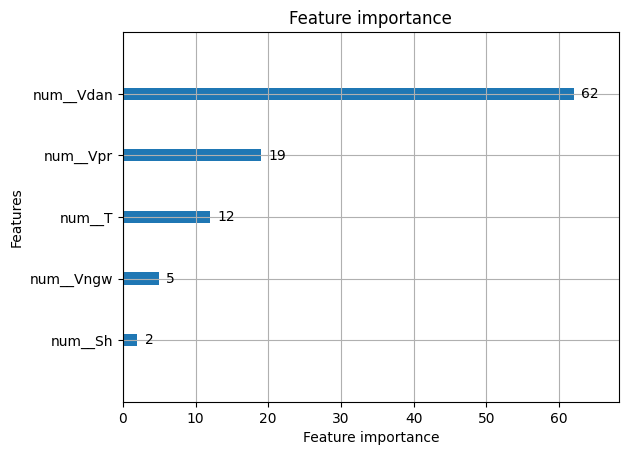

In [ ]:
lgb.plot_importance(model)


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

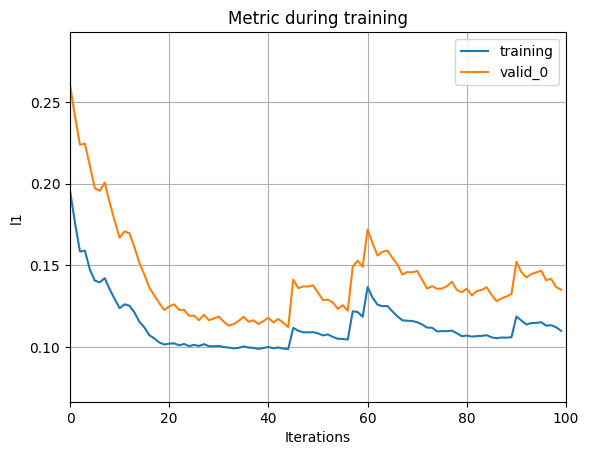

In [ ]:

lgb.plot_metric(model,
                metric='l1')

In [ ]:

model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Vpr', 'Vngw', 'Vdan', 'Ppr', 'Ef', 'W', 'T', 'Sh', 'Angle'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 LGBMRegressor(bagging_fraction=0.8631930790871352,
                               bagging_freq=6, boosting_type='dart',
                               feature_fraction=0.600517219514599,
                               lambda_l1=3.354857282663859e-08,
                               lambda_l2=0.003013094954077307,
                               min_child_samples=9, n_estimator=100,
                               num_leaves=49, verbose=-1))])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


def objective(trial):
  """
  Функція objective для Optuna, яка навчає модель LightGBMRegressor
  на тренувальному наборі даних та оцінює її на тестовому наборі.

  Args:
      trial (optuna.Trial): Об'єкт Optuna, що представляє один набір гіперпараметрів.

  Returns:
      float: Значення метрики оцінки (R2).
  """

  model_type = trial.suggest_categorical("model_type", ['LinReg', 'DT', 'LGBM'])

  if model_type == 'LinReg':
    model = LinearRegression()

  elif model_type == 'DT':
    model = DecisionTreeRegressor(
        max_depth = trial.suggest_int('max_depth', 2, 12),
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 100)
    )

  elif model_type == 'LGBM':
    model = lgb.LGBMRegressor(
        objective = 'mse',
        verbose=-1,
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        lambda_l1 = trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        lambda_l2 = trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        num_leaves = trial.suggest_int('num_leaves', 2, 256),
        feature_fraction = trial.suggest_float('feature_fraction', 0.4, 1.0),
        bagging_fraction = trial.suggest_float('bagging_fraction', 0.4, 1.0),
        bagging_freq = trial.suggest_int('bagging_freq', 1, 7),
        min_child_samples = trial.suggest_int('min_child_samples', 5, 100),


    )

  # Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)
  r2 = metrics.r2_score(y_val, y_pred)

  # Повернення значення метрики:
  return r2


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-05-18 21:15:58,445] A new study created in memory with name: no-name-c62d7128-4ff5-47ba-98f2-af141a7561e3
[I 2024-05-18 21:15:58,462] Trial 0 finished with value: -0.013193156050298693 and parameters: {'model_type': 'DT', 'max_depth': 3, 'min_samples_leaf': 22}. Best is trial 0 with value: -0.013193156050298693.
[I 2024-05-18 21:15:58,479] Trial 1 finished with value: -0.013193156050298693 and parameters: {'model_type': 'DT', 'max_depth': 9, 'min_samples_leaf': 62}. Best is trial 0 with value: -0.013193156050298693.
[I 2024-05-18 21:15:58,495] Trial 2 finished with value: -0.013193156050298693 and parameters: {'model_type': 'DT', 'max_depth': 6, 'min_samples_leaf': 67}. Best is trial 0 with value: -0.013193156050298693.
[I 2024-05-18 21:15:58,545] Trial 3 finished with value: 0.9606217417576703 and parameters: {'model_type': 'LinReg'}. Best is trial 3 with value: 0.9606217417576703.
[I 2024-05-18 21:15:58,566] Trial 4 finished with value: -0.013193156689227159 and parameters: {

In [ ]:
study.best_value

0.9606217417576703

In [ ]:
df['Vjpr'] = pd.to_numeric(df['Vjpr'], errors='coerce')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-05-18 21:12:30,712] A new study created in memory with name: no-name-e0038f11-8452-44d5-a20f-1e02a1322040
[I 2024-05-18 21:12:30,728] Trial 0 finished with value: -0.013193156689227159 and parameters: {'boosting_type': 'dart', 'lambda_l1': 1.5241193090214464, 'lambda_l2': 5.244765590550655e-06, 'num_leaves': 36, 'feature_fraction': 0.672912232247683, 'bagging_fraction': 0.7169058685351002, 'bagging_freq': 7, 'min_child_samples': 67}. Best is trial 0 with value: -0.013193156689227159.
[I 2024-05-18 21:12:30,740] Trial 1 finished with value: -0.013193156689227159 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.048825984390777406, 'lambda_l2': 7.779324214632863e-07, 'num_leaves': 247, 'feature_fraction': 0.5893087262601039, 'bagging_fraction': 0.49259261575717456, 'bagging_freq': 5, 'min_child_samples': 23}. Best is trial 0 with value: -0.013193156689227159.
[I 2024-05-18 21:12:30,752] Trial 2 finished with value: -0.013193156689227159 and parameters: {'boosting_type': 'g

In [ ]:
df1.head()

,Vpr,Vjpr,Vngw,Vdan,Ppr,Ef,W,T,Sh,Angle,Vjpr_new
0,0.10,0.1,680.0,15.0,0.0015,83.0,0.03,25.0,65.0,7.0,0.1
1,0.40,0.1,975.0,23.0,0.0096,22.0,0.05,30.0,70.0,8.0,0.1
2,0.05,0.1,570.0,37.0,0.0228,57.0,0.07,28.0,68.0,6.0,0.1
3,0.60,0.1,1980.0,47.0,0.1782,95.0,0.04,32.0,72.0,9.0,0.1
4,0.15,0.1,2400.0,52.0,0.0624,41.0,0.06,27.0,67.0,10.0,0.1


In [ ]:
df1['Vjpr_new'].describe()

count    37.000000
mean      0.478378
std       0.278024
min       0.100000
25%       0.300000
50%       0.500000
75%       0.700000
max       0.900000
Name: Vjpr_new, dtype: float64

In [ ]:
y = df1['Vjpr_new']
X = df1.drop(columns='Vjpr_new')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.75,
                                                  random_state=42)

print(f'Train: {X_train.shape[0]} samples \t {round(X_train.shape[0] / X.shape[0] * 100)}%')
print(f'Test:  {X_test.shape[0]} samples \t {round(X_test.shape[0] / X.shape[0] * 100)}%')
print(f'Val:   {X_val.shape[0]} samples \t {round(X_val.shape[0] / X.shape[0] * 100)}%')

Train: 21 samples 	 57%
Test:  8 samples 	 22%
Val:   8 samples 	 22%


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False))])

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Vpr', 'Vjpr', 'Vngw', 'Vdan', 'Ppr', 'Ef', 'W', 'T', 'Sh', 'Angle'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index([], dtype='object'))])

In [ ]:
# навчання препроцесора
X_train = preprocessor.fit_transform(X_train)

# обробка даних
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn import metrics


def objective(trial):
  """
  Функція objective для Optuna, яка навчає модель LightGBMRegressor
  на тренувальному наборі даних та оцінює її на тестовому наборі.

  Args:
      trial (optuna.Trial): Об'єкт Optuna, що представляє один набір гіперпараметрів.

  Returns:
      float: Значення метрики оцінки (R2).
  """

  # 1. Визначення гіперпараметрів:

  params = {
        'objective': 'mse',
        'n_estimator': 30,
        'verbose': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

  # 2. Створення моделі LightGBMRegressor:

  model = lgb.LGBMRegressor(**params)

  # 3. Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # 4. Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)
  r2 = metrics.r2_score(y_val, y_pred)

  # 5. Повернення значення метрики:
  return r2

In [ ]:

#optuna.logging.set_verbosity(optuna.logging.WARNING) # щоб не виводило інформацію про trial

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-05-18 21:12:31,120] A new study created in memory with name: no-name-4900114a-3c6a-4c3d-acb5-249f0004c828
[I 2024-05-18 21:12:31,145] Trial 0 finished with value: -0.013193156689227159 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 2.921072400036483e-08, 'lambda_l2': 1.9672147552976848e-07, 'num_leaves': 227, 'feature_fraction': 0.43174530118168614, 'bagging_fraction': 0.7209391626707303, 'bagging_freq': 1, 'min_child_samples': 11}. Best is trial 0 with value: -0.013193156689227159.
[I 2024-05-18 21:12:31,180] Trial 1 finished with value: 0.680991060420338 and parameters: {'boosting_type': 'dart', 'lambda_l1': 3.354857282663859e-08, 'lambda_l2': 0.003013094954077307, 'num_leaves': 49, 'feature_fraction': 0.600517219514599, 'bagging_fraction': 0.8631930790871352, 'bagging_freq': 6, 'min_child_samples': 9}. Best is trial 1 with value: 0.680991060420338.
[I 2024-05-18 21:12:31,202] Trial 2 finished with value: -0.013193156689227159 and parameters: {'boosting_type': 'gbdt',

In [ ]:
print(f"найкраща метрика: {study.best_value}")

найкраща метрика: 0.680991060420338


In [ ]:
best_params = study.best_params

model = lgb.LGBMRegressor(**best_params,
                          n_estimator = 100,
                          verbose=-1)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_metric='mae')


LGBMRegressor(bagging_fraction=0.8631930790871352, bagging_freq=6,
              boosting_type='dart', feature_fraction=0.600517219514599,
              lambda_l1=3.354857282663859e-08, lambda_l2=0.003013094954077307,
              min_child_samples=9, n_estimator=100, num_leaves=49, verbose=-1)

In [ ]:

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)


In [ ]:

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,0.11,0.13
RMSE,0.14,0.15
R2,0.69,0.73


In [ ]:
optuna.visualization.plot_param_importances(study)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

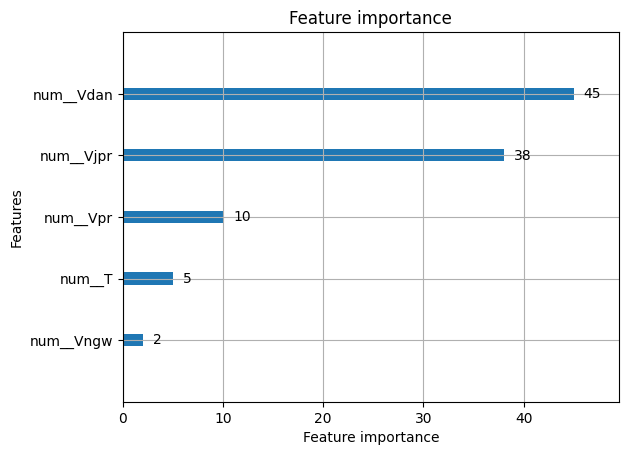

In [ ]:
lgb.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

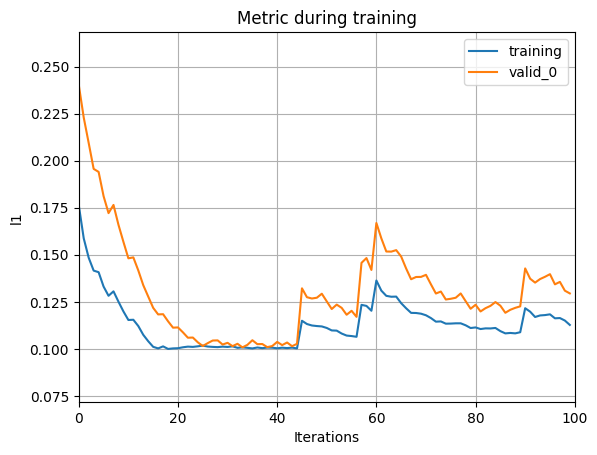

In [ ]:
lgb.plot_metric(model,
                metric='l1')

In [ ]:

model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Vpr', 'Vjpr', 'Vngw', 'Vdan', 'Ppr', 'Ef', 'W', 'T', 'Sh', 'Angle'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 LGBMRegressor(bagging_fraction=0.8631930790871352,
                               bagging_freq=6, boosting_type='dart',
                               feature_fraction=0.600517219514599,
                               lambda_l1=3.354857282663859e-08,
                               lambda_l2=0.003013094954077307,
                               min_child_samples=9, n_estimator=100,
                               num_leaves=49, verbose=-1))])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


def objective(trial):
  """
  Функція objective для Optuna, яка навчає модель LightGBMRegressor
  на тренувальному наборі даних та оцінює її на тестовому наборі.

  Args:
      trial (optuna.Trial): Об'єкт Optuna, що представляє один набір гіперпараметрів.

  Returns:
      float: Значення метрики оцінки (R2).
  """

  model_type = trial.suggest_categorical("model_type", ['LinReg', 'DT', 'LGBM'])

  if model_type == 'LinReg':
    model = LinearRegression()

  elif model_type == 'DT':
    model = DecisionTreeRegressor(
        max_depth = trial.suggest_int('max_depth', 2, 12),
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 100)
    )

  elif model_type == 'LGBM':
    model = lgb.LGBMRegressor(
        objective = 'mse',
        verbose=-1,
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        lambda_l1 = trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        lambda_l2 = trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        num_leaves = trial.suggest_int('num_leaves', 2, 256),
        feature_fraction = trial.suggest_float('feature_fraction', 0.4, 1.0),
        bagging_fraction = trial.suggest_float('bagging_fraction', 0.4, 1.0),
        bagging_freq = trial.suggest_int('bagging_freq', 1, 7),
        min_child_samples = trial.suggest_int('min_child_samples', 5, 100),


    )

  # Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)
  r2 = metrics.r2_score(y_val, y_pred)

  # Повернення значення метрики:
  return r2


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-05-18 21:17:37,075] A new study created in memory with name: no-name-103b6571-5248-44d4-9b04-d4d416a3b3be
[I 2024-05-18 21:17:37,112] Trial 0 finished with value: -0.013193156050298693 and parameters: {'model_type': 'DT', 'max_depth': 11, 'min_samples_leaf': 60}. Best is trial 0 with value: -0.013193156050298693.
[I 2024-05-18 21:17:37,132] Trial 1 finished with value: -0.013193156689227159 and parameters: {'model_type': 'LGBM', 'boosting_type': 'dart', 'lambda_l1': 1.033003100883546, 'lambda_l2': 0.0008135879140891286, 'num_leaves': 246, 'feature_fraction': 0.6809740349589113, 'bagging_fraction': 0.6989711216776802, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 0 with value: -0.013193156050298693.
[I 2024-05-18 21:17:37,149] Trial 2 finished with value: -0.013193156689227159 and parameters: {'model_type': 'LGBM', 'boosting_type': 'gbdt', 'lambda_l1': 0.0005529374506279876, 'lambda_l2': 0.165353783319142, 'num_leaves': 211, 'feature_fraction': 0.4961979326049683, '

In [ ]:
study.best_value

0.9606217417576703